# Перцептрон Розенблатта
```
import numpy as np


class Perceptron(object):
    """
    Классификация на основе перцептрона.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Обучение.
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """
        Вычисление общего входа.
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """
        Возврашает метку класса после одной итерации
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
```

Перцептрон Розенблатта:
* инициализация весов небольшими случайными значениями
* для каждого обучающего образца $x^{(i)}$
	* вычислить выходное значение $\check{y}$
	* обновить веса.

* $w_j$ = $w_j$+$\Delta$ $w_j$

* $\Delta$ $w_j$=$\eta$($y^{(i)}$-$\check{y}^{(i)}$)*$x^{(i)}_j$

где 
* $\eta$ скорость обучения( константа 0.0 - 1.0)
* ${y}^{(i)}$ метка класса i
* $\check{y}^{(i)}$ спрогнозированная метка класса


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from perceptron import Perceptron

In [2]:
iris = load_iris()

In [3]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
y = iris.target
X = df_iris

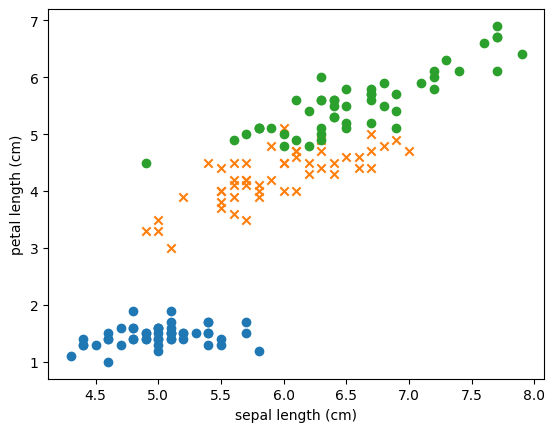

In [8]:
plt.scatter(X[:50]['sepal length (cm)'].values,X[:50]['petal length (cm)'].values)
plt.scatter(X[50:100]['sepal length (cm)'].values,X[50:100]['petal length (cm)'].values, marker='x')
plt.scatter(X[100:150]['sepal length (cm)'].values,X[100:150]['petal length (cm)'].values, marker='o')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show();

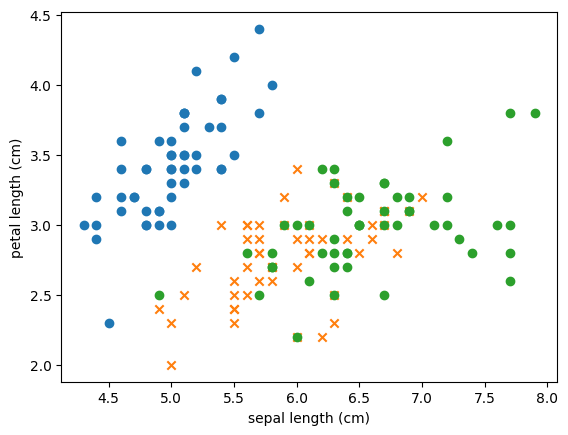

In [9]:
plt.scatter(X[:50]['sepal length (cm)'].values,X[:50]['sepal width (cm)'].values)
plt.scatter(X[50:100]['sepal length (cm)'].values,X[50:100]['sepal width (cm)'].values, marker='x')
plt.scatter(X[100:150]['sepal length (cm)'].values,X[100:150]['sepal width (cm)'].values, marker='o')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show();

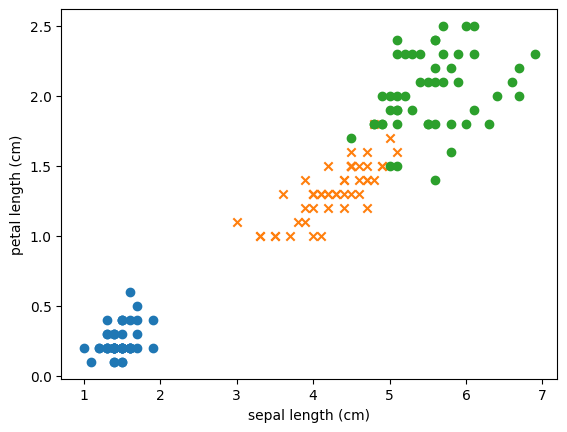

In [10]:
plt.scatter(X[:50]['petal length (cm)'].values,X[:50]['petal width (cm)'].values)
plt.scatter(X[50:100]['petal length (cm)'].values,X[50:100]['petal width (cm)'].values, marker='x')
plt.scatter(X[100:150]['petal length (cm)'].values,X[100:150]['petal width (cm)'].values, marker='o')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show();

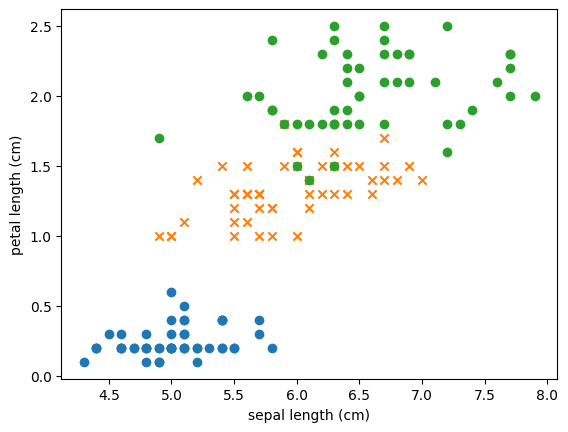

In [11]:
plt.scatter(X[:50]['sepal length (cm)'].values,X[:50]['petal width (cm)'].values)
plt.scatter(X[50:100]['sepal length (cm)'].values,X[50:100]['petal width (cm)'].values, marker='x')
plt.scatter(X[100:150]['sepal length (cm)'].values,X[100:150]['petal width (cm)'].values, marker='o')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show();

In [12]:
X = X[:100][['petal length (cm)','sepal width (cm)']].values
y = y[:100]

In [13]:
model_perceptrom = Perceptron(eta=0.1, n_iter=10)
model_perceptrom.fit(X,y)

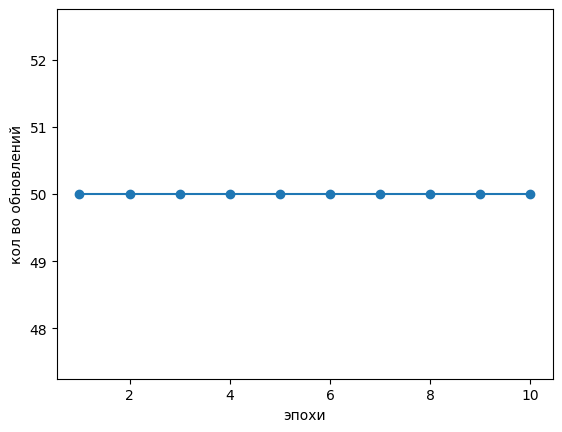

In [14]:
plt.plot(range(1,len(model_perceptrom.errors_)+1), model_perceptrom.errors_, marker='o')
plt.xlabel('эпохи')
plt.ylabel('кол во обновлений');

In [15]:
from matplotlib.colors import ListedColormap

def plot_result(X,y, classifier, resolution=0.02):
    marker = ('s', 'x', 'o', '4', '4')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[:,0],
                    y=X[:,1],
                    alpha=0.8,
                    )


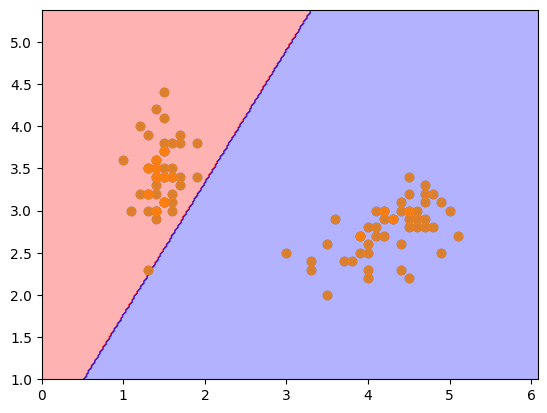

In [16]:
plot_result(X, y, model_perceptrom)